In [2]:
include("Main_module.jl")
using .TDQMC
using PyPlot, Distributions, Random

In [3]:
P = Parameter{Float64,Int64}()
Dy = Dynamics{Float64}();

In [4]:
Dy.Trajectory

1×500 Matrix{Float64}:
 -0.105875  0.797215  -1.21028  3.68549  …  1.01199  0.789616  -0.460616

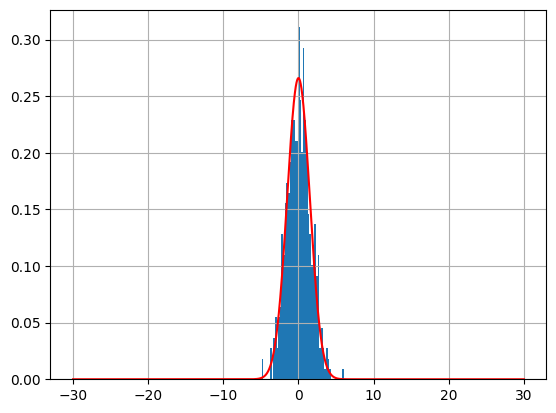

In [6]:
hist(Dy.Trajectory', 50, density = true);
plot(P.sampling, pdf(Normal(0, 1.5), P.sampling), color = "red")
grid()
xlim(-10, 10)

In [6]:
parallel_CTE!(P, Dy)

[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 2]
[2, 2, 2, 2]
[2, 2, 2, 2]
[2, 2, 2, 2]
[2, 2, 2, 3]
[3, 2, 2, 3]
[3, 2, 3, 3]
[3, 3, 3, 3]
[3, 3, 3, 4]
[4, 3, 3, 4]
[4, 4, 3, 4]
[4, 4, 4, 4]
[5, 4, 4, 5]
[5, 4, 4, 5]
[5, 4, 5, 5]
[5, 5, 5, 5]
[6, 5, 5, 5]
[6, 5, 5, 6]
[6, 5, 6, 6]
[6, 6, 6, 6]
[6, 6, 6, 7]
[7, 6, 6, 7]
[7, 6, 7, 7]
[7, 7, 7, 7]
[7, 7, 7, 8]
[8, 7, 7, 8]
[8, 7, 8, 8]
[8, 8, 8, 8]
[8, 8, 8, 9]
[9, 8, 8, 9]
[9, 8, 9, 9]
[9, 9, 9, 9]
[9, 9, 9, 10]
[10, 9, 9, 10]
[10, 10, 9, 10]
[10, 10, 10, 10]
[10, 10, 10, 11]
[11, 10, 10, 11]
[11, 11, 10, 11]
[11, 11, 11, 11]
[11, 11, 11, 12]
[12, 11, 11, 12]
[12, 11, 12, 12]
[12, 12, 12, 12]
[13, 13, 12, 13]
[13, 13, 13, 13]
[13, 13, 13, 13]
[13, 13, 13, 13]
[13, 13, 14, 13]
[14, 13, 14, 13]
[14, 14, 14, 13]
[14, 14, 14, 14]
[14, 14, 15, 14]
[14, 15, 15, 14]
[15, 15, 15, 14]
[15, 15, 15, 15]
[15, 16, 15, 15]
[15, 16, 16, 15]
[16, 16, 16, 15]
[16, 16, 16, 16]
[16, 17, 16, 16]
[16, 17, 16, 17]
[16, 17, 17, 17]
[17, 17, 17

In [10]:
using DataFrames, CSV

In [13]:
df = CSV.read("Ground_Wave_Func.csv", DataFrame)
df.wave = @. real(parse(Complex{Float64}, df.wave))

20001-element Vector{Float64}:
 1.1110523894453942e-15
 1.126714462768829e-15
 1.1151255463373956e-15
 1.0960310192892259e-15
 1.1043909637021962e-15
 1.096314727810028e-15
 1.0776968646269636e-15
 1.1032404449202764e-15
 1.0938574723245351e-15
 1.0849673934826716e-15
 1.0816200942518743e-15
 1.0837449096125486e-15
 1.0754001676147728e-15
 ⋮
 1.180968988896895e-15
 1.1649967443657957e-15
 1.148401704064087e-15
 1.1493675292280298e-15
 1.1646359753265938e-15
 1.162362931175561e-15
 1.1602418902076246e-15
 1.1507581622946283e-15
 1.1498347780801389e-15
 1.1360058853718269e-15
 1.1249116240775495e-15
 1.1242458211985764e-15

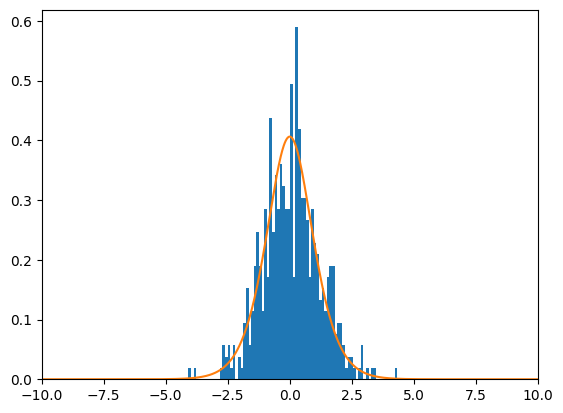

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [7]:
hist(Dy.Trajectory',80, density = true)
plot(P.sampling, abs2.(Dy.Guide_Wave[1]))
xlim(-10,10)
show()

In [9]:
println(fit(Normal, Dy.Trajectory'))    #拟合粒子的分布

Normal{Float64}(μ=0.06832094625354727, σ=1.1594681005456111)


In [10]:
using LsqFit        #最小二乘非线性拟合
model(x, p) = 1 / (sqrt(2 * pi) * p[2]) * @. exp(-(x - p[1])^2 / (2 * p[2]^2))
ydata = abs2.(Dy.Guide_Wave[1])
p0 = [0.0, 2.0]
#ydata = model(P.sampling, p0)
fit0 = LsqFit.curve_fit(model, P.sampling, ydata, p0)
fit0.param

2-element Vector{Float64}:
 5.596734849580868e-13
 1.0038042441411146

In [8]:
sum(Dy.Energy)/length(Dy.Energy)                 #计算平均能量

-0.6697788081533117

In [11]:
wave = DataFrame()
wave.x = P.sampling
wave.wave_1 = sum(abs, hcat(Dy.Guide_Wave[1, :]...), dims = 2)[:] / size(Dy.Guide_Wave, 2)
#CSV.write("Ground_Guide_Wave.csv", wave)

20001-element Vector{Float64}:
 3.5418372528626053e-206
 7.096692188689261e-206
 1.0677852905841755e-205
 1.4299147621985567e-205
 1.7975212876278813e-205
 2.1721759308228544e-205
 2.5555833919834506e-205
 2.949607755258665e-205
 3.3562976175636594e-205
 3.7779104534814135e-205
 4.216936080392378e-205
 4.67611911545147e-205
 5.158480365001926e-205
 ⋮
 7.325148650710072e-205
 6.601269963224331e-205
 5.910037267378506e-205
 5.247107260221119e-205
 4.608522121849883e-205
 3.990674800265856e-205
 3.3902730735891313e-205
 2.8043024893893903e-205
 2.229988326915064e-205
 1.6647567497707766e-205
 1.106195319285009e-205
 5.520130285406941e-206

In [12]:
plot(P.sampling, abs.(wave.wave_1), marker="*", label = "TDQMC Complex Time")
plot(P.sampling, abs.(df.wave), color = "red", label = "TDSE Img Time")
legend()
xlim(-10, 10)
grid()

LoadError: UndefVarError: df not defined

In [18]:
Dy.Time

500-element Vector{Union{Float64, ComplexF64}}:
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
                    ⋮
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.000000000000078im
 15.000000000000078 - 15.00

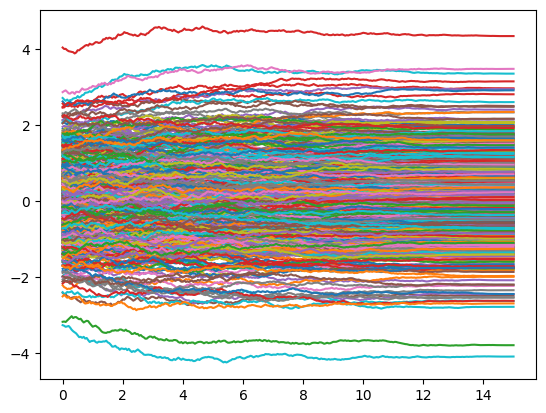

500-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000007C1D7580>
 PyObject <matplotlib.lines.Line2D object at 0x000000007C1D75E0>
 PyObject <matplotlib.lines.Line2D object at 0x000000007C1D7700>
 PyObject <matplotlib.lines.Line2D object at 0x000000007C1D7820>
 PyObject <matplotlib.lines.Line2D object at 0x000000007C1D7940>
 PyObject <matplotlib.lines.Line2D object at 0x000000007C1D7A60>
 PyObject <matplotlib.lines.Line2D object at 0x000000007C1D7B80>
 PyObject <matplotlib.lines.Line2D object at 0x000000007C1D7CA0>
 PyObject <matplotlib.lines.Line2D object at 0x000000007C1D7DC0>
 PyObject <matplotlib.lines.Line2D object at 0x000000007C1D7EE0>
 PyObject <matplotlib.lines.Line2D object at 0x000000007C1D75B0>
 PyObject <matplotlib.lines.Line2D object at 0x000000007C1C9460>
 PyObject <matplotlib.lines.Line2D object at 0x000000007C1C9490>
 ⋮
 PyObject <matplotlib.lines.Line2D object at 0x0000000000FB5190>
 PyObject <matplotlib.lines.Line2D object at 0x000

In [10]:
plot(real(P.Δt).* (0:P.step_t), Dy.Displace[:, :, 1])

In [18]:
hcat(Dy.Guide_Wave[1 ,:]...)

20001×200 Matrix{ComplexF64}:
 1.31934e-25-1.02577e-24im  …  4.00598e-27-5.43707e-26im
 2.63716e-25-2.05127e-24im      8.0069e-27-1.08732e-25im
 3.95192e-25-3.07627e-24im     1.19977e-26-1.63073e-25im
 5.26211e-25-4.10048e-24im     1.59733e-26-2.17385e-25im
 6.56621e-25-5.12367e-24im     1.99287e-26-2.71658e-25im
 7.86269e-25-6.14556e-24im  …  2.38587e-26-3.25882e-25im
 9.15004e-25-7.16591e-24im     2.77585e-26-3.80048e-25im
 1.04267e-24-8.18445e-24im     3.16229e-26-4.34145e-25im
 1.16913e-24-9.20093e-24im     3.54469e-26-4.88164e-25im
 1.29422e-24-1.02151e-23im     3.92255e-26-5.42095e-25im
  1.4178e-24-1.12267e-23im  …  4.29538e-26-5.95929e-25im
 1.53971e-24-1.22354e-23im     4.66267e-26-6.49656e-25im
 1.65981e-24-1.32411e-23im     5.02393e-26-7.03266e-25im
            ⋮               ⋱  
 1.53971e-24-1.22354e-23im     4.66267e-26-6.49656e-25im
  1.4178e-24-1.12267e-23im  …  4.29538e-26-5.95929e-25im
 1.29422e-24-1.02151e-23im     3.92255e-26-5.42095e-25im
 1.16913e-24-9.20093e-24im

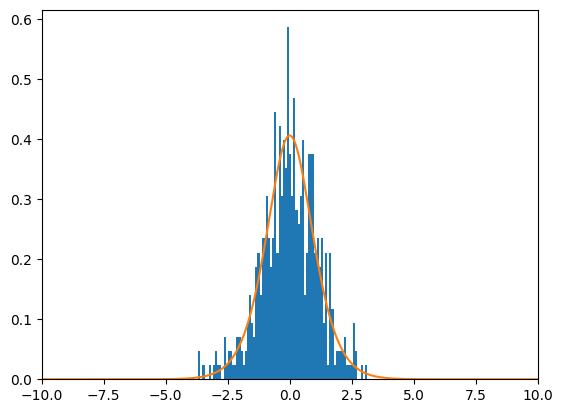

(-10.0, 10.0)

In [11]:
Vector_ch = choose(500, x = P.sampling, y = abs2.(Dy.Guide_Wave[1]))
hist(Vector_ch, 80, density = true)
plot(P.sampling, abs2.(Dy.Guide_Wave[1]))
xlim(-10, 10)

In [12]:
Dy.Trajectory[:] = Vector_ch

for i in 1:P.Group
    Dy.Energy[i] = Group_Energy(P, Dy, i)
end

sum(Dy.Energy) / length(Dy.Energy)   

-0.669778147485088